# Advanced Statistics with Python 

## We will cover 4 major topics :

- One-Sample Hypothesis Test
- Two-Sample Independent Hypothesis T-Test
- One-Way Analysis of Variance
- Chi-Squared Test of Independence

#### Hypothesis testing

A hypothesis is simply put an educated guess about something. You should be able to test it, either by experiment or observation. 

Hypothesis testing is simply a way for you to test your results of an experiment to verify if you have meaningful results.

These hypothesis are usually in the form : If I change, i.e. increase/decrease, this independent variable then the dependent variable will change, i.e. increase/decrease.

You hypothesis should include :

- if/then statement
- Specify both the independent and dependent variables
- Be testable by experiment, survey or other scientifically sound technique.
- Should have some design criteria

When formulating your hypothesis you also have to specify what the null hypothesis is.... which essentially states what happens if your hypothesis is wrong. Meaning that nothing happens.


### Blueprint for conducting hypothesis testing is :

- Collect data in such a way that you have a random sample, this is so that it is representative of the population you're studying

- Formulate your hypothesis

- Figure out the distribution your population follows (more on this later)

    - based on said distribution figure out what type of test to use, i.e. parametric/non-parametric, one or two tailed
    
- Pick the appropriate test to verify hypothesis

- Find the critical value, this is based on the alpha value (more on this later)

- Run statistical test. Based on result, accept/reject the null hypothesis using the p-value and test statistic.


















A quick glance at some of the distributions out there :

- Beta Distribution.
- Exponential Distribution.
- Gamma Distribution.
- Inverse Gamma Distribution.
- Log Normal Distribution.
- Logistic Distribution.
- Maxwell-Boltzmann Distribution.
- Poisson Distribution.
- Skewed Distribution.
- Symmetric Distribution.
- Uniform Distribution.
- Unimodal Distribution.
- Weibull Distribution.

[Here](http://people.stern.nyu.edu/adamodar/New_Home_Page/StatFile/statdistns.htm) is a neat website that does a pretty good job at explaining some of these distributions.

### One-Sample Hypothesis Test

- One tailed : right-tailed or left-tailed
- Two tailed, aka inequality

### Z-test : this is a test that is used to validate a hypothesis that the sample drawn belongs to the same population

Requires : 
- sample to be normally distributed
- population mean
- population standard deviation
- sample size greater than 30

Null hypothesis : Sample mean is the same as the population mean

Alternative : Sample mean is lower, higher or not the same





https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html#statsmodels.stats.weightstats.ztest

statsmodels.stats.weightstats.ztest(x1, x2=None, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)[source]¶
test for mean based on normal distribution, one or two samples

In the case of two samples, the samples are assumed to be independent.

Parameters
x1: array_like, 1-D or 2-D
first of the two independent samples

x2: array_like, 1-D or 2-D
second of the two independent samples

value: float
In the one sample case, value is the mean of x1 under the Null hypothesis. In the two sample case, value is the difference between mean of x1 and mean of x2 under the Null hypothesis. The test statistic is x1_mean - x2_mean - value.

alternative: str
The alternative hypothesis, H1, has to be one of the following

‘two-sided’: H1: difference in means not equal to value (default) ‘larger’ : H1: difference in means larger than value ‘smaller’ : H1: difference in means smaller than value

usevar: str, ‘pooled’
Currently, only ‘pooled’ is implemented. If pooled, then the standard deviation of the samples is assumed to be the same. see CompareMeans.ztest_ind for different options.

ddof: int
Degrees of freedom use in the calculation of the variance of the mean estimate. In the case of comparing means this is one, however it can be adjusted for testing other statistics (proportion, correlation)

Returns
tstat: float
test statistic

pvalue: float
pvalue of the t-test

In [1]:
from IPython.core.interactiveshell import InteractiveShell # make all output in ipython show, not just last line
# pretty print all cell's output and not just the last one
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
# from scipy import stats
from statsmodels.stats import weightstats as stests

#This comes from a Kaggle data set
df = pd.read_csv("cardio_train.csv", sep=';')

# df.head()

ztest ,pval = stests.ztest(df['ap_hi'], x2=None, value=128)  # compares mean of ap_hi to 128

print("z-score",ztest)
print("p-value", float(pval))

if pval<0.05:
    print("reject null hypothesis, sample mean is different than 128, p-value is less than 0.05")
else:
    print("accept null hypothesis, sample mean is 128, p-value is greater than 0.05")

z-score 1.4040093635408895
p-value 0.16031606130705378
accept null hypothesis, sample mean is 128, p-value is greater than 0.05


A z-score, or z-statistic, is a number representing how many standard deviations above or below the mean population the score derived from a z-test is. Essentially, it is a numerical measurement that describes a value's relationship to the mean of a group of values. If a z-score is 0, it indicates that the data point's score is identical to the mean score. A z-score of 1.0 would indicate a value that is one standard deviation from the mean. Z-scores may be positive or negative, with a positive value indicating the score is above the mean and a negative score indicating it is below the mean.

In this case the z-score is barely over 1 so it is not significant.

In [3]:
import pandas as pd
# from scipy import stats
from statsmodels.stats import weightstats as stests


stests.ztest?

### T-test : this test is used to compare the mean of 2 given samples when the population parameters are, like mean and standard deviation, are not known.

Requires :
- normal distribution of the sample 
- independance of samples
- homogeneity of variance

Null hypothesis : means are the same

Alternative : Sample mean is lower, higher or not the same

3 versions are available :
- One sample t-test : compares the mean of the single group against a know mean
- Independent samples t-test : compares the mean for 2 distinct groups
- Paired samples t-test : compares the mean from the same group at different times

What does the t-score mean ?

#### Two-Sample Independent Hypothesis T-Test

#### Let's see if the number of miles ran by Boulderites is greater than Denverites

In [4]:
#Independent samples t-test
from statsmodels.stats.weightstats import ttest_ind
import numpy as np

Let's use the Statsmodels package

In [5]:
import numpy as np
#Random sampling from a group of Boulderites
b_miles = np.random.normal(12.5, 2.6, 1000)

#Random sampling from a group of Denverites 
d_miles = np.random.normal(10.7, 2.1, 1000)

In [6]:
#Perform the test :
ttest_stats = ttest_ind(b_miles, d_miles)
ttest_stats

(14.740439190162396, 9.23423140265986e-47, 1998.0)

The t score is a ratio between the difference between two groups and the difference within the groups. The larger the t score, the more difference there is between groups. The smaller the t score, the more similarity there is between groups. A t score of 3 means that the groups are three times as different from each other as they are within each other. When you run a t test, the bigger the t-value, the more likely it is that the results are repeatable.

A large t-score tells you that the groups are different.
A small t-score tells you that the groups are similar.

T-Values and P-values

How big is “big enough”? Every t-value has a p-value to go with it. A p-value is the probability that the results from your sample data occurred by chance. P-values are from 0% to 100%. They are usually written as a decimal. For example, a p value of 5% is 0.05. Low p-values are good; They indicate your data did not occur by chance. For example, a p-value of .01 means there is only a 1% probability that the results from an experiment happened by chance. In most cases, a p-value of 0.05 (5%) is accepted to mean the data is valid.

In [7]:
# Small smaple size, only 20 people
#Random sampling from a group of Boulderites
b_miles = np.random.normal(12.5, 2.6, 20)

#Random sampling from a group of Denverites 
d_miles = np.random.normal(10.7, 2.1, 20)
#Perform the test :
ttest_stats = ttest_ind(b_miles, d_miles)
ttest_stats

(2.395875566688508, 0.021610646689590656, 38.0)

The t-score is now 1 and the p-value is > 0.05 so the difference are not significant.  The means and standard deviations are the same, but the sample size is lower.  Fewer samples give you less confidence the sample mean is the true mean.

In [8]:
from statsmodels.stats.weightstats import ttest_ind
ttest_ind?

Now using Scipy instead

In [9]:
from scipy.stats import ttest_ind

ttest_sp = ttest_ind(b_miles, d_miles)
ttest_sp

Ttest_indResult(statistic=2.395875566688508, pvalue=0.021610646689590656)

In [10]:
#Dependent samples t-test
from scipy.stats import ttest_rel

ttest_pair = ttest_rel(b_miles, d_miles)
ttest_pair

Ttest_relResult(statistic=2.2978728748780415, pvalue=0.033096514366158104)

### ANOVA (ANalaysis Of VAriance) : this is an extension of the t-test which allows you to compare multiple (3 or more) samples with a single test. This test looks for variation within groups and between groups.

Requires :
- data must be close to normal distribution
- samples must be independent
- sample variances must be equal
- similar sample sizes

2 versions :
- One way ANOVA : this is used to compare the difference between the 3 or more samples/groups of a single independent variable
- Two way ANOVA : is an extension of the one-way ANOVA, which allows you to see the impact of two independent variables

Null : All pairs of samples are the same, i.e. all sample means are equal

Alternative : At least one pair of samples is significantly different


The following examples comes from [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)

In [11]:
import scipy.stats as stats

'''Here are some data on a shell measurement (the length of the anterior adductor muscle scar, standardized by 
dividing by length) in the mussel Mytilus trossulus from five locations: 
-Tillamook, Oregon
-Newport, Oregon
-Petersburg, Alaska 
-Magadan, Russia
-Tvarminne, Finland 
taken from a much larger data set used in McDonald et al. (1991).

Used for identifying empty shells to determine their correct taxonomic placement
'''
    
tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735,
              0.0659, 0.0923, 0.0836]

newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835,
            0.0725]

petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]

magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764,
            0.0689]

tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]


stats.f_oneway(tillamook, newport, petersburg, magadan, tvarminne)

#The results tell us that the shell measurement is statistically different. 
# small p-value means the differences in means is very small

'Here are some data on a shell measurement (the length of the anterior adductor muscle scar, standardized by \ndividing by length) in the mussel Mytilus trossulus from five locations: \n-Tillamook, Oregon\n-Newport, Oregon\n-Petersburg, Alaska \n-Magadan, Russia\n-Tvarminne, Finland \ntaken from a much larger data set used in McDonald et al. (1991).\n\nUsed for identifying empty shells to determine their correct taxonomic placement\n'

F_onewayResult(statistic=7.121019471642447, pvalue=0.0002812242314534544)

The F-statistic is simply a ratio of two variances. Variances are a measure of dispersion, or how far the data are scattered from the mean. Larger values represent greater dispersion.

To use the F-test to determine whether group means are equal, it’s just a matter of including the correct variances in the ratio. In one-way ANOVA, the F-statistic is this ratio:

F = variation between sample means / variation within the samples

In [12]:
np.mean(tillamook)
np.mean(newport)
np.mean(magadan)
np.mean(tvarminne)

0.0802

0.07479999999999999

0.0780125

0.09570000000000001

In [13]:
np.std(tillamook)
np.std(newport)
np.std(magadan)
np.std(tvarminne)

0.011349361215504599

0.008041921412199952

0.012108616508503357

0.011832300424403249

In [14]:
stats.f_oneway(magadan, newport)  # cannot reject null hypothesis that they have the same mean

F_onewayResult(statistic=0.3419031652866346, pvalue=0.5680371510358366)

In [15]:
stats.f_oneway(tvarminne, newport)  # reject null hypothesis that the means are the same

F_onewayResult(statistic=13.239731419310028, pvalue=0.0033964848625714075)

In [16]:
import scipy.stats as stats

stats.f_oneway?

### Chi-square test : this is used to verify independance of categorical variables

Requires :
- independent samples
- variables to be categorical

2 versions :
- Goodness of fit test, which determines if a sample matches the population
- Chi-squared fit test for 2 independent variables is used to compare variables in a contingency table to check if the data fits.

Null : Variable A and variable B are independent.

A small(high) chi-square value means that the data fits, i.e. there is (not) a relationship. This is a real number that tells you how much difference exists between your observed count and the count you would expect if there were no relationship at all in the population.

To perform a chi-squared test and get a p-value you need :
- degrees of freedom - 1
- alpha level, this is chosen by the user. Usually 0.05 is used.

Let's take a look at a chi-square test using die

In [17]:
from scipy import stats
import numpy as np

In [18]:
#Generate random die rolls
r1 = np.random.randint(1,7,5000)
r2 = np.random.randint(1,7,5000)
r3 = np.random.randint(1,7,5000)
r4 = np.random.randint(1,7,5000)
r5 = np.random.randint(1,7,5000)


#Calculate the counts for each face of the die
unique, counts1 = np.unique(r1, return_counts=True)
unique, counts2 = np.unique(r2, return_counts=True)
unique, counts3 = np.unique(r3, return_counts=True)
unique, counts4 = np.unique(r4, return_counts=True)
unique, counts5 = np.unique(r5, return_counts=True)

#Combine the results
die_rolls = np.array([counts1, counts2, counts3, counts4, counts5])
# show the actual number of rolls
dr = pd.DataFrame(die_rolls,columns = ['1','2','3','4','5','6'],index=['r1','r2','r3','r4','r5'])
dr

,1,2,3,4,5,6
r1,850,795,846,831,826,852
r2,834,836,891,849,813,777
r3,839,878,824,843,813,803
r4,832,828,817,802,881,840
r5,827,854,814,835,818,852


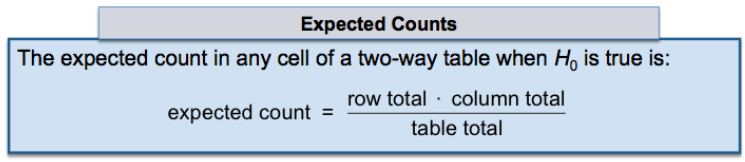
 https://www.westga.edu/academics/research/vrc/assets/docs/ChiSquareTest_LectureNotes.pdf

In [19]:
total = dr.sum().sum()
rowtotal = dr.sum(axis=1)
coltotal = dr.sum(axis=0)
total
coltotal
rowtotal
expected = pd.DataFrame(5000,index = dr.index, columns = dr.columns)  # every row total is 5000
expected = expected.multiply(coltotal, axis=1)/total  # multiply by coltotal and divide by total (25,000)
expected

25000

1    4182
2    4191
3    4192
4    4160
5    4151
6    4124
dtype: int64

r1    5000
r2    5000
r3    5000
r4    5000
r5    5000
dtype: int64

,1,2,3,4,5,6
r1,836.4,838.2,838.4,832.0,830.2,824.8
r2,836.4,838.2,838.4,832.0,830.2,824.8
r3,836.4,838.2,838.4,832.0,830.2,824.8
r4,836.4,838.2,838.4,832.0,830.2,824.8
r5,836.4,838.2,838.4,832.0,830.2,824.8


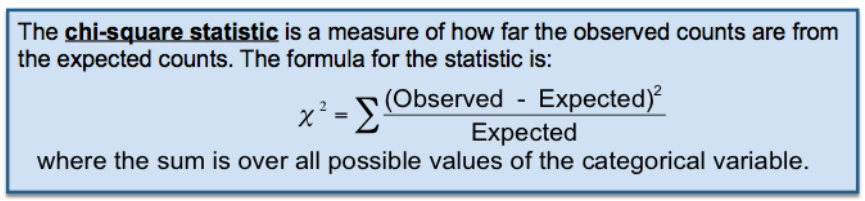

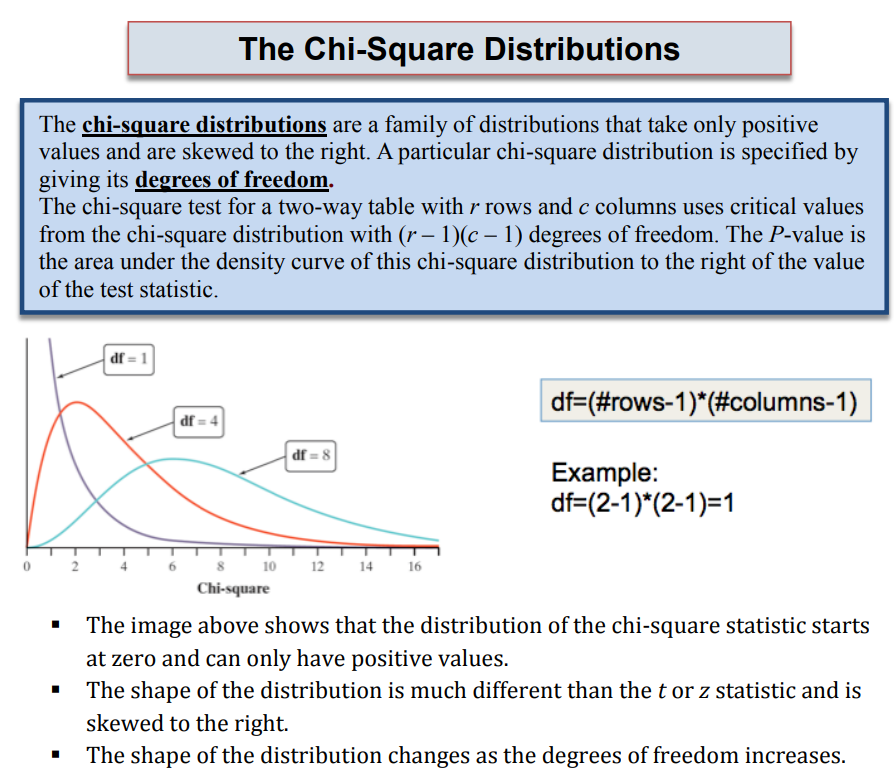

In [20]:


#Running the test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(die_rolls)

#Print out the results
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")

print("===Degrees of Freedom===")  # (r - 1)(c - 1) and we have 5 rows, 6 columns, so (5-1)(6-1) = 20
print(dof)
print("\n")

print("===P-Value===")
print(p_val)
print("\n")

print("===Contingency Table===")
print(ex)    # contingency table, ex, is the table of expected values we calculated above

===Chi2 Stat===
20.810220139901407


===Degrees of Freedom===
20


===P-Value===
0.4083776653999293


===Contingency Table===
[[836.4 838.2 838.4 832.  830.2 824.8]
 [836.4 838.2 838.4 832.  830.2 824.8]
 [836.4 838.2 838.4 832.  830.2 824.8]
 [836.4 838.2 838.4 832.  830.2 824.8]
 [836.4 838.2 838.4 832.  830.2 824.8]]


### Is the Chi squared value enough to reject the null hypothesis?

The p-value is greater than 0.05 so we cannot reject the null hypothesis.  We cannot say the mean value are different for the different dice.

Chi squared value is 21.99.  The degrees of freedom are 20.  Our critical value is a p-value of 0.05.  Looking at the table, we need a Chi squared value of 31.4 or larger to be able to reject the null hypothesis.  For a p-value of 0.01, we need a Chi squared of 37.6 or greater.

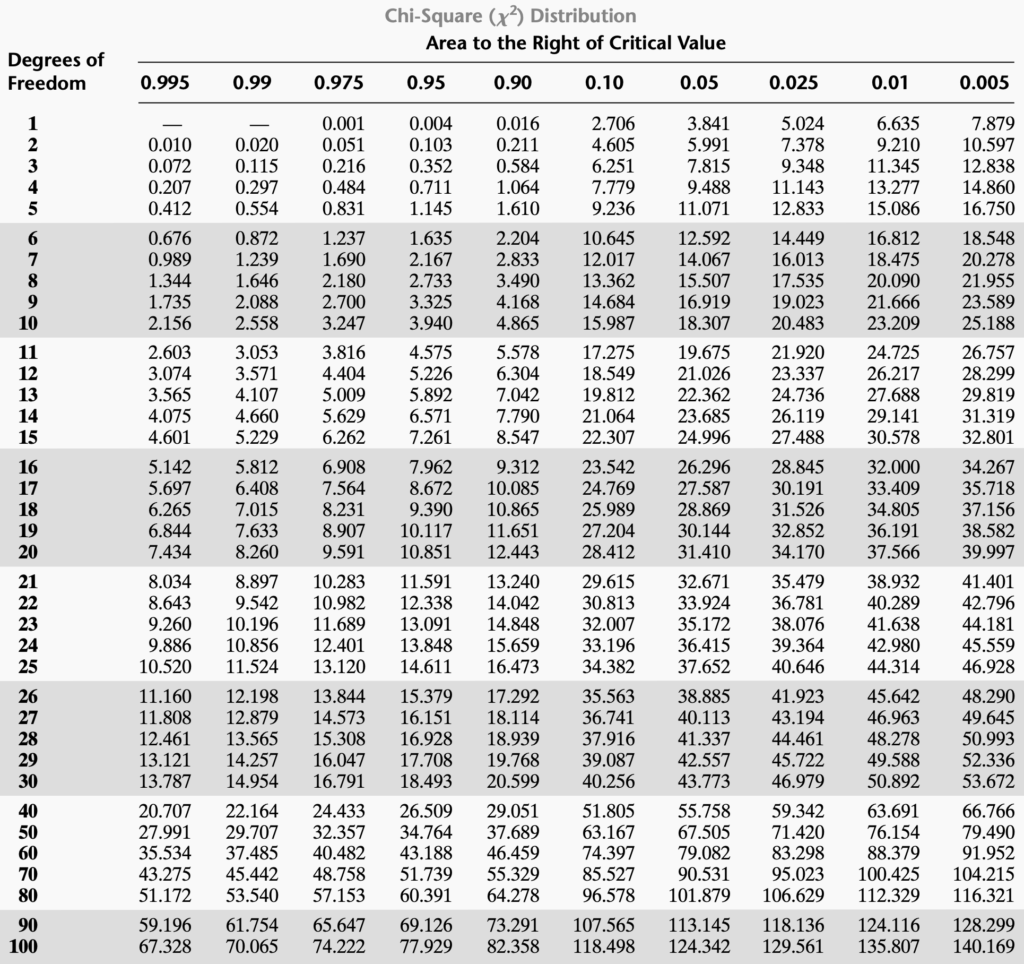

### Another ANOVA test example
One-Way ANOVA
It is a test where a particular factor has more than 2 groups or levels of interest. For example, let μ be the true mean annual salary of graduates
Single-factor of interest = Study subjects
Assume we have 6 categories of study subjects, Factor levels = athematics and Statistics, Economics and Finance, Environmental Sciences, Political Science, Social Sciences and Biology.

Hence, there are 6 levels or groups of this single factor in affecting the mean of the annual salary of graduates.

The basic idea behind a one-way ANOVA is to take independent random samples from each group, then compute the sample means for each group. After that compare the variation of sample means among the groups to the variation within the groups. Finally, make a decision based on a test statistic, whether the means of the groups are all equal or not.

Sum of Squares (SS)

Inside the One-Way ANOVA Table:

The total amount of variability comes from two possible sources, namely:

1. Difference among the groups, called treatment (TR)

2. Difference within the groups, called error (E)

The sum of the squares due to treatment (SSTR) and the sum of squares due to error (SSE) are listed in the one-way ANOVA table. The sum of SSTR and SSE is equal to the total sum of squares (SSTO).

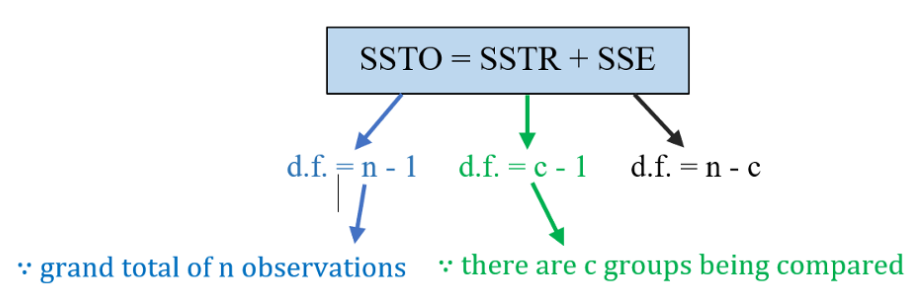

Just like for SS, d.f. (SSTO) = d.f. (SSTR) + d.f. (SSE)

Mean Squares (MS)

A mean square is the sum of squares divided by its d.f. These mean squares are all variances and will be used in the hypothesis test of the equality of all the group population means.

Assumptions for the one-way ANOVA hypothesis test

Sample data are randomly selected from populations and randomly assigned to each of the treatment groups. Each observation is thus independent of any other observation — randomness and independence.

Normality. Values in each sampled groups are assumed to be drawn from normally distributed populations. We can use normal probability plot or Q-Q plot to check normality.

Homogeneity of variance. All the c group variances are equal, that is σ₁² = σ₂² = σ₃² = … = σ𝒸². As a rule of thumb, if the ratio of the largest to the smallest sample standard deviation is less than 2, we consider the equal standard deviations assumption as fulfilled.

The simple outline of the one-way ANOVA test:

F test for differences in more than two means

H₀: μ₁= μ₂ = μ₃ = … = μ𝒸

H₁: Not all μᵢ’s are equal, where i = 1, 2, 3, …, c.

Level of significance = α

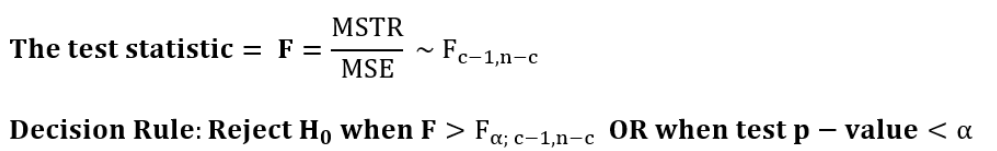

Finally, the one-way ANOVA table is as shown below:

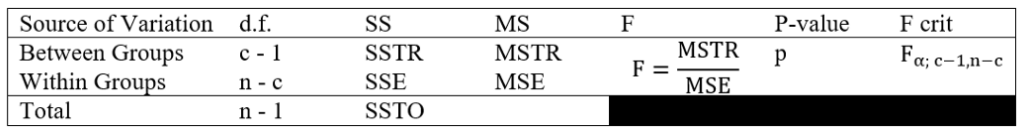

students.csv has 8239 rows, each row represents a different student.  Is there enough eveidence to say there is a significant difference in the annual average salary for the 6 different study subjects?  First, filter for only students that graduated.

In [21]:
import pandas as pd
import random

# read original dataset
student_df = pd.read_csv('students.csv')

# filter the students who are graduated
graduated_student_df = student_df[student_df['graduated'] == 1]

# random sample for 500 students 
#unique_student_id = list(graduated_student_df['stud.id'].unique())
#random.seed(30) # set a seed so that everytime we will extract same sample
#sample_student_id = random.sample(unique_student_id, 500)
#sample_df = graduated_student_df[graduated_student_df['stud.id'].isin(sample_student_id)].reset_index(drop=True)

sample_df = graduated_student_df

# two variables of interest
sample_df = sample_df[['major', 'salary']]
groups = sample_df.groupby('major').count().reset_index()
# groups.plot(kind='bar',x='major',y='salary')
groups


,major,salary
0,Biology,330
1,Economics and Finance,295
2,Environmental Sciences,345
3,Mathematics and Statistics,288
4,Political Science,289
5,Social Sciences,206


### Normality Assumption Check
Before we perform the hypothesis test, we check if the assumptions for the one-way ANOVA hypothesis test are fulfilled. The samples are random and independent samples. Now, we check the normality assumption by plotting a normal probability plot (Q-Q plots) for each grouped variable.

The Q-Q plot shows a largely straight-line pattern if it is from a normal distribution. From the above figure, we may assume that the data for each group falls roughly on a straight line.

Text(0.5, 1.0, 'Probability Plot - Economics and Finance')

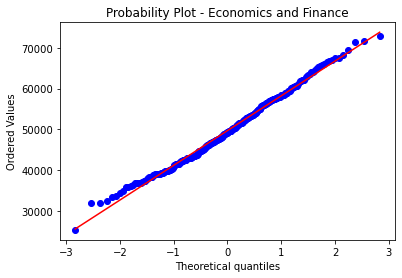

Text(0.5, 1.0, 'Probability Plot - Environmental Sciences')

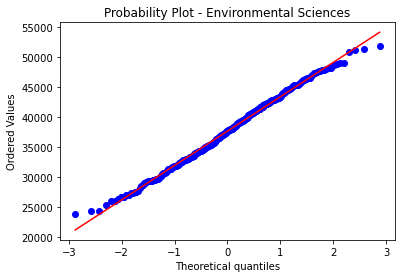

Text(0.5, 1.0, 'Probability Plot - Political Science')

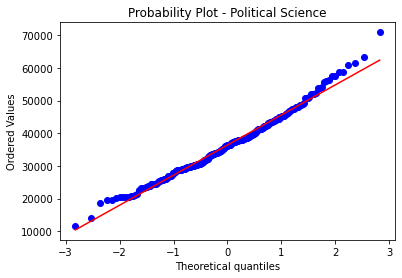

Text(0.5, 1.0, 'Probability Plot - Mathematics and Statistics')

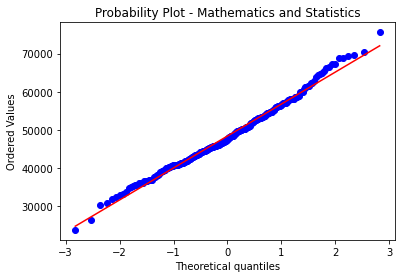

Text(0.5, 1.0, 'Probability Plot - Biology')

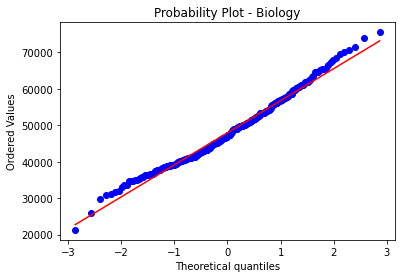

Text(0.5, 1.0, 'Probability Plot - Social Sciences')

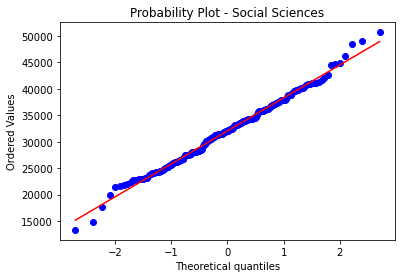

In [22]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

unique_majors = sample_df['major'].unique()
for major in unique_majors:
    x = stats.probplot(sample_df[sample_df['major'] == major]['salary'], dist="norm", plot=plt)  # x= because it also returns values I don't want printed
    plt.title("Probability Plot - " +  major)
    plt.show()

### Homogeneity of variance Assumption Check

The ratio of the largest to the smallest sample standard deviation is 1.67. That is less than the threshold of 2. Thus, we conclude that the assumptions are fulfilled.

In [23]:
# calculate ratio of the largest to the smallest sample standard deviation
ratio = sample_df.groupby('major').std().max() / sample_df.groupby('major').std().min()
ratio
sample_df.groupby('major').std()

salary    1.615048
dtype: float64

,salary
major,
Biology,8816.127264
Economics and Finance,8495.624305
Environmental Sciences,5709.916421
Mathematics and Statistics,8355.358883
Political Science,9221.790894
Social Sciences,6204.670006


### Hypothesis Testing
According to five steps process of hypothesis testing:

H₀: μ₁= μ₂ = μ₃ = … = μ₆

H₁: Not all salary means are equal

α = 0.05

According to F test statistics:

In [24]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = sample_df['salary'].mean()
SSTR = sample_df.groupby('major').count() * (sample_df.groupby('major').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['salary'].sum()

# calculate SSE and update anova table
SSE = (sample_df.groupby('major').count() - 1) * sample_df.groupby('major').std()**2
anova_table['SS']['Within Groups'] = SSE['salary'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['salary'].sum() + SSE['salary'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = sample_df['major'].nunique() - 1
anova_table['df']['Within Groups'] = sample_df.shape[0] - sample_df['major'].nunique()
anova_table['df']['Total'] = sample_df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,76641259228.175583,5,15328251845.635117,242.50048,0.0,2.573734
Within Groups,110426403870.7397,1747,63209160.773177,,,
Total,187067663098.915283,1752,106773780.3076,,,


In [25]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 242.5004802806966  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 242.5004802806966  and critical value is: 2.573733696175986
Null Hypothesis is rejected.


### Conclusion: We have enough evidence that not all average salaries are the same for graduates of different study subjects, at 5% significance level.







### In class exercise

Is there a relationship between major and religion?

In [26]:
# read original dataset
student_df = pd.read_csv('students.csv')
student_df
student_df = student_df[['major','religion']]

,stud.id,name,gender,age,height,weight,religion,nc.score,semester,major,minor,score1,score2,online.tutorial,graduated,salary
1,833917,"Gonzales, Christina",Female,19,160,64.8,Muslim,1.91,1st,Political Science,Social Sciences,NaN,NaN,0,0,NaN
2,898539,"Lozano, T'Hani",Female,19,172,73.0,Other,1.56,2nd,Social Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
3,379678,"Williams, Hanh",Female,22,168,70.6,Protestant,1.24,3rd,Social Sciences,Mathematics and Statistics,45.0,46.0,0,0,NaN
4,807564,"Nem, Denzel",Male,19,183,79.7,Other,1.37,2nd,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
5,383291,"Powell, Heather",Female,21,175,71.4,Catholic,1.46,1st,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8235,818044,"Her, Joshua",Male,22,181,79.1,Protestant,2.91,6th,Environmental Sciences,Social Sciences,73.0,71.0,0,1,36750.087135
8236,560166,"Reid, Jose",Male,23,178,72.6,Catholic,2.03,2nd,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
8237,380174,"Villa, Raechelle",Female,20,169,67.7,Other,3.72,3rd,Environmental Sciences,Economics and Finance,77.0,75.0,1,0,NaN
8238,540967,"Ngo, Preston",Male,23,195,98.6,Other,2.74,4th,Social Sciences,Political Science,50.0,46.0,1,1,40112.041834


### Create a crosstab to get the actual counts

In [27]:
dfcross = pd.crosstab(index=student_df['religion'], columns=student_df['major'])
dfcross

major,Biology,Economics and Finance,Environmental Sciences,Mathematics and Statistics,Political Science,Social Sciences
religion,,,,,,
Catholic,545,463,557,439,468,325
Muslim,69,42,73,40,66,40
Orthodox,100,87,132,83,106,77
Other,534,430,509,382,471,362
Protestant,349,302,355,281,344,208


In [28]:
#Running the test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(dfcross)

#Print out the results
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")

print("===Degrees of Freedom===")  # (r - 1)(c - 1) and we have 5 rows, 6 columns, so (5-1)(6-1) = 20
print(dof)
print("\n")

print("===P-Value===")
print(p_val)
print("\n")

print("===Contingency Table===")
dfex = pd.DataFrame(ex, index = dfcross.index, columns = dfcross.columns)
dfex    # contingency table, ex, is the table of expected values we calculated above
print("===Actual Values===")
dfcross

===Chi2 Stat===
23.880622594357582


===Degrees of Freedom===
20


===P-Value===
0.2476457333279503


===Contingency Table===


major,Biology,Economics and Finance,Environmental Sciences,Mathematics and Statistics,Political Science,Social Sciences
religion,,,,,,
Catholic,542.154266,449.475422,551.999272,415.866610,493.947688,343.556742
Muslim,63.965287,53.030708,65.126836,49.065421,58.277704,40.534045
Orthodox,113.393009,94.008982,115.452118,86.979609,103.310475,71.855808
Other,521.026338,431.959218,530.487681,399.660153,474.698386,330.168224
Protestant,356.461100,295.525671,362.934094,273.428207,324.765748,225.885180


===Actual Values===


major,Biology,Economics and Finance,Environmental Sciences,Mathematics and Statistics,Political Science,Social Sciences
religion,,,,,,
Catholic,545,463,557,439,468,325
Muslim,69,42,73,40,66,40
Orthodox,100,87,132,83,106,77
Other,534,430,509,382,471,362
Protestant,349,302,355,281,344,208


The p-value is greater than 0.05 so we cannot reject the null hypothesis.  We cannot say the mean value are different for the different majors.

### Is there a relationship between gender and major?

In [29]:
# read original dataset
student_df = pd.read_csv('students.csv')
student_df = student_df[['major','gender']]
dfcrossn = pd.crosstab(index=student_df['gender'], columns=student_df['major'], normalize= 'columns', margins=True)
print("===Normalized crosstab===")
dfcrossn
dfcross = pd.crosstab(index=student_df['gender'], columns=student_df['major'])

#Running the test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(dfcross)

#Print out the results
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")

print("===Degrees of Freedom===")  # (r - 1)(c - 1) and we have 5 rows, 6 columns, so (5-1)(6-1) = 20
print(dof)
print("\n")

print("===P-Value===")
print(p_val)
print("\n")

print("===Contingency Table===")
dfex = pd.DataFrame(ex, index = dfcross.index, columns = dfcross.columns)
dfex    # contingency table, ex, is the table of expected values we calculated above
print("===Actual Table===")
dfcross

===Normalized crosstab===


major,Biology,Economics and Finance,Environmental Sciences,Mathematics and Statistics,Political Science,Social Sciences,All
gender,,,,,,,
Female,0.600501,0.348187,0.45818,0.225306,0.672165,0.682806,0.498847
Male,0.399499,0.651813,0.54182,0.774694,0.327835,0.317194,0.501153


===Chi2 Stat===
875.438915638748


===Degrees of Freedom===
5


===P-Value===
5.501737149286024e-187


===Contingency Table===


major,Biology,Economics and Finance,Environmental Sciences,Mathematics and Statistics,Political Science,Social Sciences
gender,,,,,,
Female,796.658575,660.473358,811.125137,611.087511,725.822309,504.833111
Male,800.341425,663.526642,814.874863,613.912489,729.177691,507.166889


===Actual Table===


major,Biology,Economics and Finance,Environmental Sciences,Mathematics and Statistics,Political Science,Social Sciences
gender,,,,,,
Female,959,461,745,276,978,691
Male,638,863,881,949,477,321


### How can we do a ztest to see if the number of women studying in each field is different than the expected value of 50%

In [46]:
for maj in student_df['major'].unique():
    df = pd.get_dummies(student_df[student_df['major'] == maj]['gender'])
    ztest ,pval = stests.ztest(df['Female'], x2=None, value=0.5)
    print(maj,": z-value: ",ztest,"  p-value: ",pval)

Political Science : z-value:  13.98496283429864   p-value:  1.9257742208213384e-44
Social Sciences : z-value:  12.48980811763182   p-value:  8.485805306106102e-36
Environmental Sciences : z-value:  -3.38352589642693   p-value:  0.0007156145843446569
Economics and Finance : z-value:  -11.59097899909642   p-value:  4.5786893911685585e-31
Mathematics and Statistics : z-value:  -23.00319336981595   p-value:  4.3305644298012735e-117
Biology : z-value:  8.197319023529102   p-value:  2.458074712262908e-16


### Are male math and stats majors heavier than male Biology majors?

In [50]:
student_df = pd.read_csv('students.csv')
student_df = student_df[student_df['gender'] == 'Male']
student_df = student_df[['major','weight']]
mathdf = student_df[student_df['major'] == 'Mathematics and Statistics']
biodf = student_df[student_df['major'] == 'Biology']


In [52]:
biodf['weight'].mean()
biodf['weight'].std()
mathdf['weight'].mean()
mathdf['weight'].std()

78.62492163009392

7.721164388043577

78.46765015806095

7.411719313728651

### We cannot reject the null hypothesis that the men in both majors weigh the same

In [51]:
#Perform the test :
ttest_stats = ttest_ind(biodf['weight'], mathdf['weight'])
ttest_stats

Ttest_indResult(statistic=0.4075409643717594, pvalue=0.6836657499594534)